## Linear Regression from Scratch

**Step-by-step guide of Linear Regression**
1. Define a function that computes 'ax+b'
2. Calculate the difference of prediction (y_hat) and y
3. Define how you are going to update 'a' and 'b', and change their value
4. Iterate above

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [105]:
x = 5 * np.random.rand(100, 1)
y = 3 * x + 5 * np.random.rand(100, 1)

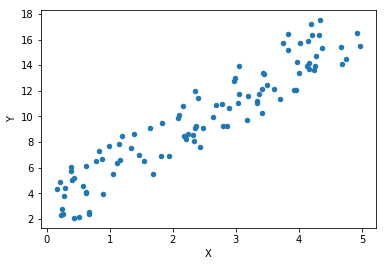

In [106]:
# TODO: look how our data look like
None

In [38]:
'''
Step 1
Define a function that computes 'ax+b'
outputs predicted array'''

def prediction(a, b, x):
    # TODO: return 'x*(transposed)a + b'
    equation = None
    return equation

In [39]:
'''Step 2
2. Calculate the difference of prediction and y
'''
learning_rate = 1e-4

# TODO: how do you calculate error
def caculate_error(a, b, x, y):
    error = None
    return error

'''Step 3
3. Define how you are going to updata 'a' and 'b'
'''
# By how much are you going to update a and b?
def update_ab(a, b, x, error, lr):
    # Update a
    delta_a = -(lr * (2 / len(error)) * (np.dot(x.T, error)))
    # Update b
    delta_b = -(lr * (2 / len(error)) * np.sum(error))

    return delta_a, delta_b

'''Step 4
4. step 2 and step 3 within iteration
'''
# calculate error for given number of times, and update a and b
def gradient_descent(x, y, iteration):
    # initial a and b set to a=0 and b=0
    a = np.zeros((1, 1))
    b = np.zeros((1, 1))

    for i in range(iteration):
        # print("a: ", a)
        # print("b: ", b)
        # TODO: get error
        error = None
        # print("error: ", error)
        # TODO: get 'delta'ed a and b
        delta_a, delta_b = None
        # update a and b
        a -= delta_a
        b -= delta_b

    return a, b

final a: [[0.06926274]] final b: [[0.02132223]]
final a: [[0.63248182]] final b: [[0.19513642]]
final a: [[2.18479395]] final b: [[0.68166754]]
final a: [[2.96314883]] final b: [[0.94018321]]
final a: [[3.2967225]] final b: [[1.42016148]]


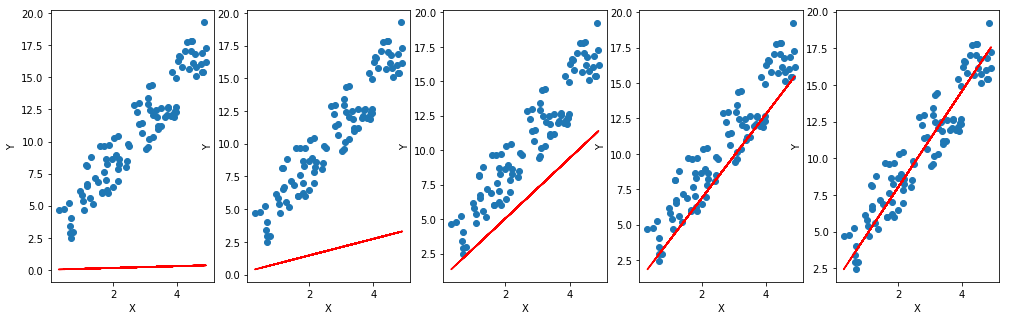

In [40]:
iterations = [10, 100, 500, 1000, 10000]

fig, ax = plt.subplots(1, 5, figsize=(17, 5))

for index, iteration in enumerate(iterations):
    # TODO get final a and b from gradient descent
    final_a, final_b = None
    print("final a:", final_a, "final b:", final_b)

    # Visualise 5 iteration graphs
    # y_pred = final_a[0][0] * x + final_b
    y_pred = prediction(final_a, final_b, x)
    ax[index].scatter(x, y)
    ax[index].plot(x, y_pred, color='r')
    ax[index].set_xlabel('X')
    ax[index].set_ylabel('Y')

plt.show()


Play around with learning rate and iteration, and try to find the best learning rate!  
What if learning rate is very big? What if it's very small?  
What you are doing right now is called Hyper-parameter Tuning / Optimisation!  
It is a whole different area, so I will not go very deep into it for now, but I encourage you to Google it.  
Let's get back to this topic after we learn Deep Learning :)

## Linear Regression using sklearn

1. Load LR model with  
    **linear_model = sklearn.linear_model.LinearRegression()**

2. Train your model with  
    **LinearRegression.fit(x, y)**

3. Predict y_hat with  
    **LinearRegression.predict(x)**

reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [45]:
from sklearn.linear_model import LinearRegression

# TODO: Load LR model!
model = None

# TODO: Train!
model.None(x, y)

# TODO: Predict!
predicted = model.None(x)

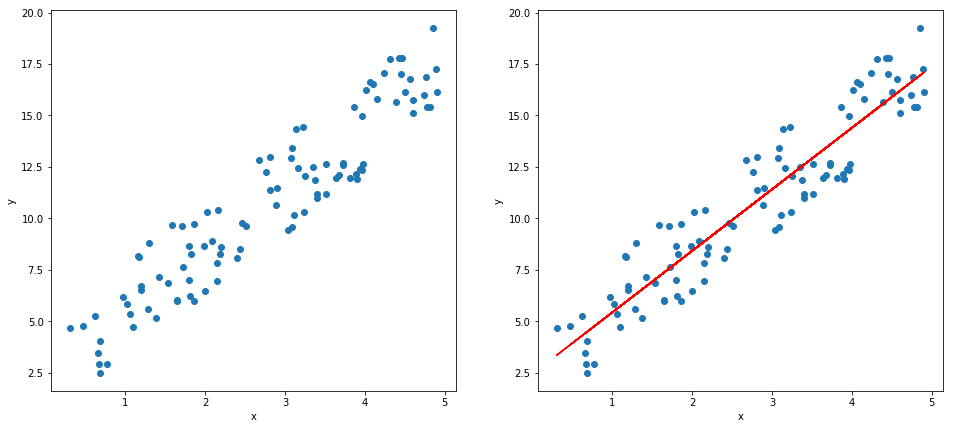

In [46]:
# Visualise
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

ax[0].scatter(x, y)
ax[1].scatter(x, y)
ax[1].plot(x, predicted, color='r')

ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
plt.show()

## Multiple Linear Regression

[Good mathematical explanation](http://mezeylab.cb.bscb.cornell.edu/labmembers/documents/supplement%205%20-%20multiple%20regression.pdf)  

[Another good explanation](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704-EP713_MultivariableMethods/BS704-EP713_MultivariableMethods2.html)

In [56]:
import csv
csvReader = csv.reader(open("./data/Advertisement.csv"))
# skip the header
next(csvReader)

x = []
y = []

for row in csvReader:
    x_i = [float(row[1]), float(row[2]), float(row[3])]
    x.append(x_i)

    y_i = float(row[4])
    y.append(y_i)

X = np.array(x)
Y = np.array(y)
print(X.shape)
print(Y.shape)
assert len(X)==len(Y)

(200, 3)
(200,)


In [57]:
# TODO: load linear regression model
model = None
# TODO: fit the model
model.None(X, Y)
Y_pred = model.None(X)

In [82]:
print(model.coef_)
print(model.intercept_)
# TODO: get coeficients for each beta
beta_0 = None   # Facebook
beta_1 = None   # Instagram
beta_2 = None   # Twitter
beta_3 = None

[ 0.04576465  0.18853002 -0.00103749]
2.938889369459405


In [59]:
# Inference
# infer an expected sales based on given values
def expected_sales(fb, insta, twitter, beta_0, beta_1, beta_2, beta_3):
    # Multiple Linear Regression Model
    sales = (beta_0 * fb) + (beta_1 * insta) + (beta_2 * twitter) + beta_3
    return sales

In [87]:
# Sales prediction
expectation = expected_sales(100, 200, 0, beta_0, beta_1, beta_2, beta_3)
print("Expected Sales: {}".format(expectation))

# Question: What do you get for (1, 0, 0), (0, 1, 0), (0, 0, 1) and (0, 0, 0)

Expected Sales: 45.221357298640044


## Polynomial Regression

Let's do Polynomial Regression using scikit-learn!  

What if our training points are non-linear and resemble curvy cosine or cubic function? We need Polynomial Regression, which is often called as Multivariate Regression

**PolynomialFeatures(degree)**: creates Polynomial object  
        `degree`: Degree of the polynomial 

**PolynomialFeatures.fit_transform(x)**: returns polynomial variables, which are 'x' and 'x to the power of degree'  

Check this link out!!  
[sklearn document](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

In [100]:
from sklearn.preprocessing import PolynomialFeatures

# Random generation of x and y
x = 3 * np.random.rand(100, 3) + 1
y = (x ** 2) + x + 2 + 5 * np.random.rand(100, 3)

print("x.shape: ", x.shape)

# TODO: Create PolynomialFeature object(degree=2, include_bias=False)
poly_feat = None

# TODO: transform your data (eg: x=[x1, x2] --> poly_x=[1, x1, x2, x1^2, x1x2, x2^2])
poly_x = None
print("poly_x.shape: ", poly_x.shape)

# TODO: Load a model. Which model should you load?
linear_model = None

# TODO: fit your model
linear_model.None;

x.shape:  (100, 3)
poly_x.shape:  (100, 10)


In [96]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

def plotting_learning_curves(model, x, y):
    # TODO: split your data into train and validation (8:2)
    x_train, x_val, y_train, y_val = None
    len_train = len(x_train)

    train_errors = []
    validation_errors = []

    for i in range(1, len_train):
        model.fit(x_train[:i], y_train[:i])
        pred_train = model.predict(x_train[:i])
        pred_val = model.predict(x_val)

        # TODO: get mean squared error of train data
        train_error = None

        # TODO: get mean squared error of validation data
        validation_error = None

        train_errors.append(train_error)
        validation_errors.append(validation_error)

    # plotting part
    plt.plot(np.sqrt(train_errors), 'r', label="Train")
    plt.plot(np.sqrt(validation_errors), 'b', label="Validation")

    plt.xlabel("size of data")
    plt.ylabel("loss")

    plt.legend(
        loc='upper right',
        shadow=True,
        fancybox=True,
        borderpad=1  # border padding of the legend box
    )

    plt.show()


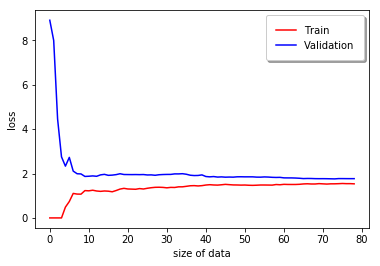

In [97]:
plotting_learning_curves(linear_model, x, y)

## Other Regressions
[**Ridge**](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)  
[**Lasso**](https://scikit-learn.org/stable/modules/linear_model.html#lasso)  
[**Elastic-Net**](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net)  

1. **load Ridge model with**  
    sklearn.linear_model.Ridge(alpha)
        alpha: scalar value

2.  **load Lasso with**  
    sklearn.linear_model.Lasso(alpha)
        alpha: scalar value

3. **load ElasticNet with**  
    sklearn.linear_model.ElasticNet(alpha, l1_ratio)
        alpha: scalar value
        l1_ratio: ratio for L1 norm

In [98]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [101]:
# Random generation of x and y
x = 5 * np.random.rand(100, 1)
y = 3 * x + 5 * np.random.rand(100, 1)

# TODO: Load Ridge and Train it!
ridge_reg = None
ridge_reg.fit(x, y)

# TODO: Load Lasso and Train it!
lasso_reg = None
lasso_reg.fit(x, y)

# TODO: Load ElasticNet and Train it!
elastic_net = None
elastic_net.fit(x, y);

In [102]:
# TODO: Predict!
ridge_y_pred = ridge_reg.None(x)
lasso_y_pred = lasso_reg.None(x)
elastic_y_pred = elastic_net.None(x)

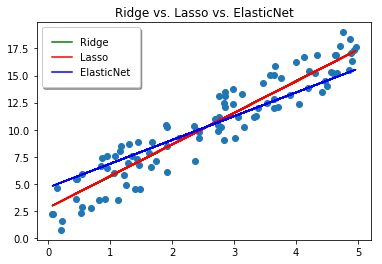

In [103]:
# Graph it!
plt.title("Ridge vs. Lasso vs. ElasticNet")
plt.scatter(x, y)

plt.plot(x, ridge_y_pred, color='green', label='Ridge')
plt.plot(x, lasso_y_pred, color='red', label='Lasso')
plt.plot(x, elastic_y_pred, color='blue', label='ElasticNet')

plt.legend(
        loc='upper left',
        shadow=True,
        fancybox=True,
        borderpad=1    # border padding of the legend box
    )

plt.show()